In [1]:
#%autosave 0

In [2]:
# import packages
import tensorflow as tf
from tensorflow import keras

2022-12-20 21:24:37.299430: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-20 21:24:37.843503: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-20 21:24:37.843588: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-20 21:24:39.273866: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

In [28]:
# download the CNN model already trained on image data from git-hub only once
# if downloading through wget doesn't work, then please download it manually from the github link below
# and change the file name manually to kitchenware-model.h5
#!wget https://github.com/bhasarma/kitchenware-classification-project/blob/main/xception_v4_2_16_0.965.h5/ -O kitchenware-model.h5

In [29]:
!python -V

Python 3.9.13


In [30]:
tf.__version__

'2.11.0'

In [31]:
ls

classes.txt               notebook-serverless-deployment.ipynb
collage.py                README.md
data/                     report.md
Dockerfile                test-image.jpg
kitchenware-model.h5      test.py
kitchenware-model.tflite  train.py
lambda_function.py        xception_v2_10_10_0.887.h5
LICENSE                   xception_v4_2_16_0.965.h5
notebook.ipynb


In [32]:
#load the model
model = keras.models.load_model('kitchenware-model.h5')

Now we want to classifiy an image using this model.

In [33]:
# run below line only once, to download our test-image
#!wget https://github.com/bhasarma/kitchenware-classification-project/blob/main/test-image.jpg

In [34]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import preprocess_input
import numpy as np

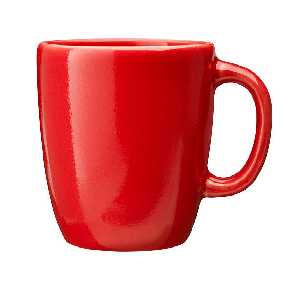

In [35]:
img = load_img('test-image.jpg', target_size =(299,299))
img

In [36]:
X = np.array(img)
X = np.array([X])
X = preprocess_input(X)

In [37]:
X.shape

(1, 299, 299, 3)

In [38]:
preds = model.predict(X)
preds

1/1 [==============================] - 1s 736ms/step


array([[ 3.052579 , -3.6500418, -2.4522264, -3.677655 , -3.6862228,
        -2.5428221]], dtype=float32)

In [39]:
classes = [
    'cup',
    'fork',
    'glass',
    'knife',
    'plate',
    'spoon'
]

In [40]:
dict(zip(classes, preds[0]))

{'cup': 3.052579,
 'fork': -3.6500418,
 'glass': -2.4522264,
 'knife': -3.677655,
 'plate': -3.6862228,
 'spoon': -2.5428221}

## Step 1: convert tensorflow / keras model to TF-Lite format

In [41]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('kitchenware-model.tflite', 'wb') as f_out:
    f_out.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmphftmsd4h/assets


INFO:tensorflow:Assets written to: /tmp/tmphftmsd4h/assets
2022-12-20 21:39:52.390145: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-12-20 21:39:52.390212: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-12-20 21:39:52.392461: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmphftmsd4h
2022-12-20 21:39:52.423685: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2022-12-20 21:39:52.423723: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /tmp/tmphftmsd4h
2022-12-20 21:39:52.505575: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled
2022-12-20 21:39:52.535128: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2022-12-20 21:39:53.076775: I tensorflow/cc/saved_model/loader.cc:213] Running initializatio

In [42]:
!ls -lh

total 322M
-rw-rw-r-- 1 bsarma bsarma   69 Dec 20 16:15 classes.txt
-rw-rw-r-- 1 bsarma bsarma 1.4K Dec 16 12:07 collage.py
drwxrwxr-x 2 bsarma bsarma 4.0K Dec 19 13:30 data
-rw-rw-r-- 1 bsarma bsarma  398 Dec 20 13:57 Dockerfile
-rw-rw-r-- 1 bsarma bsarma  81M Dec 20 21:31 kitchenware-model.h5
-rw-rw-r-- 1 bsarma bsarma  80M Dec 20 21:39 kitchenware-model.tflite
-rw-rw-r-- 1 bsarma bsarma 1.2K Dec 20 13:53 lambda_function.py
-rw-rw-r-- 1 bsarma bsarma 1.1K Dec 16 12:35 LICENSE
-rw-rw-r-- 1 bsarma bsarma 1.6M Dec 20 19:39 notebook.ipynb
-rw-rw-r-- 1 bsarma bsarma 124K Dec 20 21:38 notebook-serverless-deployment.ipynb
-rw-rw-r-- 1 bsarma bsarma 9.3K Dec 20 14:30 README.md
-rw-rw-r-- 1 bsarma bsarma  779 Nov 28 15:34 report.md
-rw-rw-r-- 1 bsarma bsarma  28K Dec 20 11:39 test-image.jpg
-rw-rw-r-- 1 bsarma bsarma  459 Dec 20 14:03 test.py
-rw-rw-r-- 1 bsarma bsarma  21K Dec 20 19:40 train.py
-rw-rw-r-- 1 bsarma bsarma  81M Dec 20 12:31 xception_v2_10_10_0.887.h5
-rw-rw-r-- 1 bsarma bsarma

Now we can use the tflite model.

In [43]:
import tensorflow.lite as tflite

In [44]:
interpreter = tflite.Interpreter(model_path='kitchenware-model.tflite')
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [45]:
interpreter.get_input_details()

[{'name': 'serving_default_input_40:0',
  'index': 0,
  'shape': array([  1, 299, 299,   3], dtype=int32),
  'shape_signature': array([ -1, 299, 299,   3], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [46]:
input_index = interpreter.get_input_details()[0]['index']

In [47]:
interpreter.get_output_details()

[{'name': 'StatefulPartitionedCall:0',
  'index': 229,
  'shape': array([1, 6], dtype=int32),
  'shape_signature': array([-1,  6], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [48]:
output_index = interpreter.get_output_details()[0]['index']

In [49]:
interpreter.set_tensor(input_index, X)

In [50]:
interpreter.invoke()

In [51]:
preds = interpreter.get_tensor(output_index)
preds

array([[ 3.0525808, -3.6500351, -2.452226 , -3.677654 , -3.6862202,
        -2.5428185]], dtype=float32)

Above are our predictions with tflite model instead of keras. 

In [52]:
classes = [
    'cup',
    'fork',
    'glass',
    'knife',
    'plate',
    'spoon'
]
dict(zip(classes, preds[0]))

{'cup': 3.0525808,
 'fork': -3.6500351,
 'glass': -2.452226,
 'knife': -3.677654,
 'plate': -3.6862202,
 'spoon': -2.5428185}

## Removing TensorFlow dependency

In [53]:
from PIL import Image

In [54]:
with Image.open('test-image.jpg') as img:
    img = img.resize((299,299), Image.NEAREST)    

/tmp/ipykernel_8652/1018085596.py:2: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  img = img.resize((299,299), Image.NEAREST)


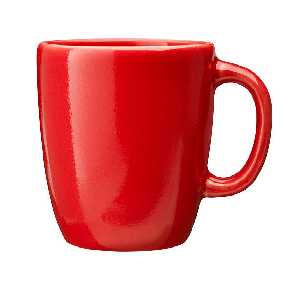

In [55]:
img

In [56]:
def preprocess_input(x):
    x /= 127.5
    x -= 1.
    return x

In [57]:
x = np.array(img, dtype='float32')
X = np.array([x])

X = preprocess_input(X)

In [58]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

In [59]:
classes = [
    'cup',
    'fork',
    'glass',
    'knife',
    'plate',
    'spoon'
]

dict(zip(classes, preds[0]))

{'cup': 3.0525808,
 'fork': -3.6500351,
 'glass': -2.452226,
 'knife': -3.677654,
 'plate': -3.6862202,
 'spoon': -2.5428185}

Above we see that we still have the same prediction, but this time without dependency on tensorflow. 

## Simpler way of doing it

Using keras-image-helper. Does it not only for xception model, but also for other models.

In [60]:
!pip install keras-image-helper

In [61]:
!pip install --extra-index-url https://google-coral.github.io/py-repo/ tflite_runtime

Looking in indexes: https://pypi.org/simple, https://google-coral.github.io/py-repo/


In [62]:
#import tensorflow.lite as tflite
import tflite_runtime.interpreter as tflite
from keras_image_helper import create_preprocessor

In [63]:
interpreter = tflite.Interpreter(model_path='kitchenware-model.tflite')
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [64]:
preprocessor = create_preprocessor('xception', target_size=(299, 299))

In [65]:
url = 'https://github.com/bhasarma/kitchenware-classification-project/blob/main/test-image.jpg?raw=true'
X = preprocessor.from_url(url)

In [66]:
X

array([[[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        ...,

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]]], dtype=float32)

In [67]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

In [68]:
classes = [
    'cup',
    'fork',
    'glass',
    'knife',
    'plate',
    'spoon'
]

dict(zip(classes, preds[0]))

{'cup': 3.0525808,
 'fork': -3.6500351,
 'glass': -2.452226,
 'knife': -3.677654,
 'plate': -3.6862202,
 'spoon': -2.5428185}